In [347]:

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Import and clean the data

In [348]:
# Load the dataset
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

# Display the first few rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [349]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [350]:
## check NaN in training data
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [351]:
## check NaN in test data
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [352]:
## clean train data
train['Age'] = train['Age'].fillna(train['Age'].mean()) # assigned the average of all ages to the missing

train['Embarked'] = train['Embarked'].fillna('S')

train.drop(columns=['Cabin'], inplace=True) # hard to come around , drop is best option
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [353]:
# clean test data
test['Age'] = test['Age'].fillna(test['Age'].mean()) # assigned the average of all ages to the missing

test['Embarked'] = test['Embarked'].fillna('S')

test.drop(columns=['Cabin'], inplace=True) # hard to come around , drop is best option
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

## Explore the data

#### Overall survival rate 

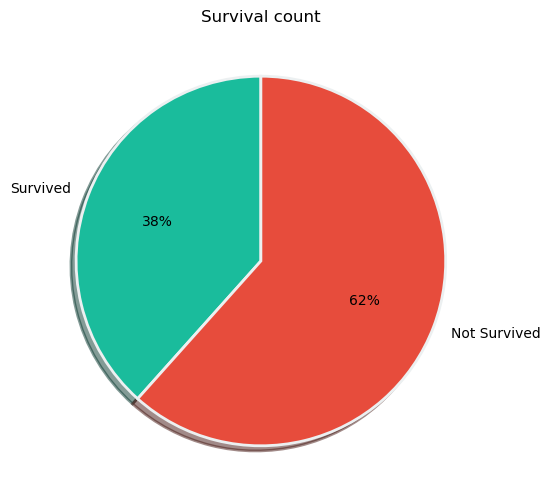

In [354]:
fig , ax = plt.subplots(
    figsize = (10,6)
)
labels = ["Survived","Not Survived"]
colors = ['#1abc9c','#e74c3c']
data = [np.sum(train['Survived'] == 1),np.sum(train['Survived'] == 0)]

ax.set(
    title = 'Survival count',
)
ax.pie(
    data,
    labels=labels,
    wedgeprops = {
    'edgecolor': '#ecf0f1',
    'linewidth': 2
    },
    autopct='%1.0f%%',
    colors = colors,
    shadow = True,
    startangle= 90
);

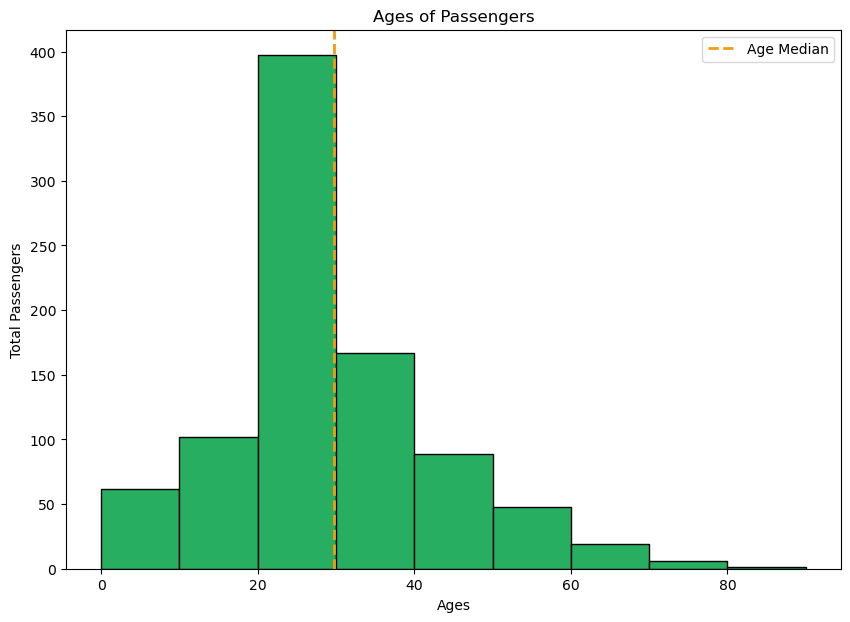

In [355]:

ages = train['Age']

fig , ax = plt.subplots(
    figsize = (10,7)
)

bins = [0,10, 20, 30, 40, 50, 60, 70, 80, 90]

ax.hist(ages, bins=bins, edgecolor='black', color='#27ae60')

ax.axvline(np.mean(ages), color='#f39c12', label='Age Median', linewidth=2, linestyle='--')

ax.legend()

ax.set(
    title = 'Ages of Passengers',
    xlabel = 'Ages',
    ylabel = 'Total Passengers'
);



#### Gender based survival rate

In [356]:
survived_men = train.loc[train.Sex == 'male']["Survived"]

survived_men_rate = np.sum(survived_men) / len(train.loc[train.Sex == 'male'])
f'{survived_men_rate * 100:.1f}% of the men survived'

'18.9% of the men survived'

In [357]:
survived_women = train.loc[train.Sex == 'female']["Survived"]

survived_women_rate = np.sum(survived_women) / len(train.loc[train.Sex == 'female'])
f'{survived_women_rate * 100:.1f}% of the men survived'

'74.2% of the men survived'

# Prediction

In [358]:
# Slice the data into features and labels
X_train_filtered = train.drop(['Name','Survived','Ticket','Fare','PassengerId'],axis=1)
y_train = train['Survived']

In [359]:
X_train_filtered.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S


In [360]:
# make it all numbered in order to train the models

# The features that need to be categorical (1 or 0)
X_train_transformed = pd.get_dummies(X_train_filtered)


In [361]:
X_train_transformed.head()

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,False,True,False,False,True
1,1,38.0,1,0,True,False,True,False,False
2,3,26.0,0,0,True,False,False,False,True
3,1,35.0,1,0,True,False,False,False,True
4,3,35.0,0,0,False,True,False,False,True


In [362]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# create a model
model = RandomForestClassifier()

X_train_filtered = train.drop(['Name','Survived','Ticket','Fare','PassengerId'],axis=1)
y_train = train['Survived']

# The features that need to be categorical (1 or 0)
X_train_transformed = pd.get_dummies(X_train_filtered)

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_train_transformed, y_train, test_size=0.2)

# train the model
model.fit(X_train,y_train)


RandomForestClassifier()

In [363]:
model.score(X_test,y_test)

0.8156424581005587

In [364]:
X_test_filtered = test.drop(['Name','Ticket','Fare','PassengerId'],axis=1)

X_test_transformed = pd.get_dummies(X_test_filtered)

predictions = model.predict(X_test_transformed)
prob = pd.DataFrame(model.predict_proba(X_test_transformed))
prob = prob * 100

In [365]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [366]:
test['Survived'] , test['Probability'] = predictions, prob[0].apply("{:.02f}".format).astype(str) + '%'

In [368]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Probability
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q,0,99.64%
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S,0,94.00%
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q,0,87.50%
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S,1,4.88%
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S,0,62.33%
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S,0,100.00%
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C,1,0.00%
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S,0,94.02%
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S,0,100.00%


In [377]:
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters grid
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["log2", "sqrt",None],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=100, # number of models to try
                            cv=5,
                            verbose=2,
                            random_state=42, # set random_state to 42 for reproducibility
                            refit=True) # set refit=True (default) to refit the best model on the full dataset 

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train) # 'rs' is short for RandomizedSearch

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1000

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=100,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['log2', 'sqrt', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   random_state=42, verbose=2)

In [375]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': None,
 'max_depth': 5}

In [376]:
rs_clf.score(X_test,y_test)

0.8044692737430168